In [1]:
from  SCluster import SCluster
import scanpy as sc
import anndata

In [2]:
import pandas as pd
data=pd.read_csv('/nfs_genome1/wanxinjiang/single_cell_benchmark/data/Metadata_Esophagus/Matrix_Esophagus.txt.gz',sep='\t')

In [3]:
type=pd.read_csv('/nfs_genome1/wanxinjiang/single_cell_benchmark/data/Metadata_Esophagus/celltype.csv')

In [2]:
# adata=anndata.read('/nfs_genome1/wanxinjiang/SCluster/data/heart.h5ad')

In [4]:
import anndata as ad
type=type['type']
adata=ad.AnnData(data.T)
adata.obs["annotation"]=type.values

/nfs_genome1/wanxinjiang/miniconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [7]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [8]:
adata.raw=adata

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata= adata[:, adata.var.highly_variable]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 10722 × 3323
    obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [11]:
SCluster_res,adata_res,test=SCluster(adata=adata,c_nums=11,\
                               simlr=True,sharp=True,scanpy=True,soup=True,\
                               first_result=True)

Performing SCluster clustering... 
Raw expression
10722 samples 16989 features

After selecting highly variable
10722 samples 3323 features



error: 'i' format requires -2147483648 <= number <= 2147483647

In [10]:
SCluster_res,adata_res,test

(AnnData object with n_obs × n_vars = 194 × 2628
     obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sharp', 'batch', 'SCluster'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm',
 AnnData object with n_obs × n_vars = 194 × 2628
     obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'soup', 'simlr', 'sharp', 'scanpy'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'log1p', 'hvg',
 AnnData object with n_obs × n_vars = 68 × 2628
     obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'soup', 'simlr', 'sharp', 'scanpy', 'batch'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 

In [11]:
import pandas as pd 
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score

In [12]:
def evaluate(true_labels,pre_labels):
    ari=''
    h_score=''
    nmi=''
    ## ARI ##
    ari=adjusted_rand_score(true_labels,pre_labels)
    ## homogeneity_score ##
    # h_score=homogeneity_score(true_labels,pre_labels)
    ## NMI ##
    nmi=normalized_mutual_info_score(true_labels,pre_labels)
    ##  FM ## 
    fm=fowlkes_mallows_score(true_labels,pre_labels)
    return [ari,nmi,fm]

In [13]:
SCluster_eva=evaluate(SCluster_res.obs['annotation'],SCluster_res.obs["SCluster"])
SCluster_eva

[0.6086872759363702, 0.6899944463201012, 0.6874354022754321]

In [14]:
SCluster_res

AnnData object with n_obs × n_vars = 194 × 2628
    obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sharp', 'batch', 'SCluster'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [16]:
soup=evaluate(adata_res.obs['annotation'],adata_res.obs["soup"])
sharp=evaluate(adata_res.obs['annotation'],adata_res.obs["sharp"])
scanpy=evaluate(adata_res.obs['annotation'],adata_res.obs["scanpy"])
# sc3=evaluate(adata_res.obs['annotation'],adata_res.obs["sc3"])
simlr=evaluate(adata_res.obs['annotation'],adata_res.obs["simlr"])
soup,sharp,scanpy,simlr

([0.385763150524156, 0.6060754597410845, 0.5003155250707634],
 [0.31227718684642086, 0.580481357134107, 0.5005376892874442],
 [0.6366026098532601, 0.7205622663603304, 0.7129794499274735],
 [0.41893892586053993, 0.6294042395501381, 0.5244736097017743])

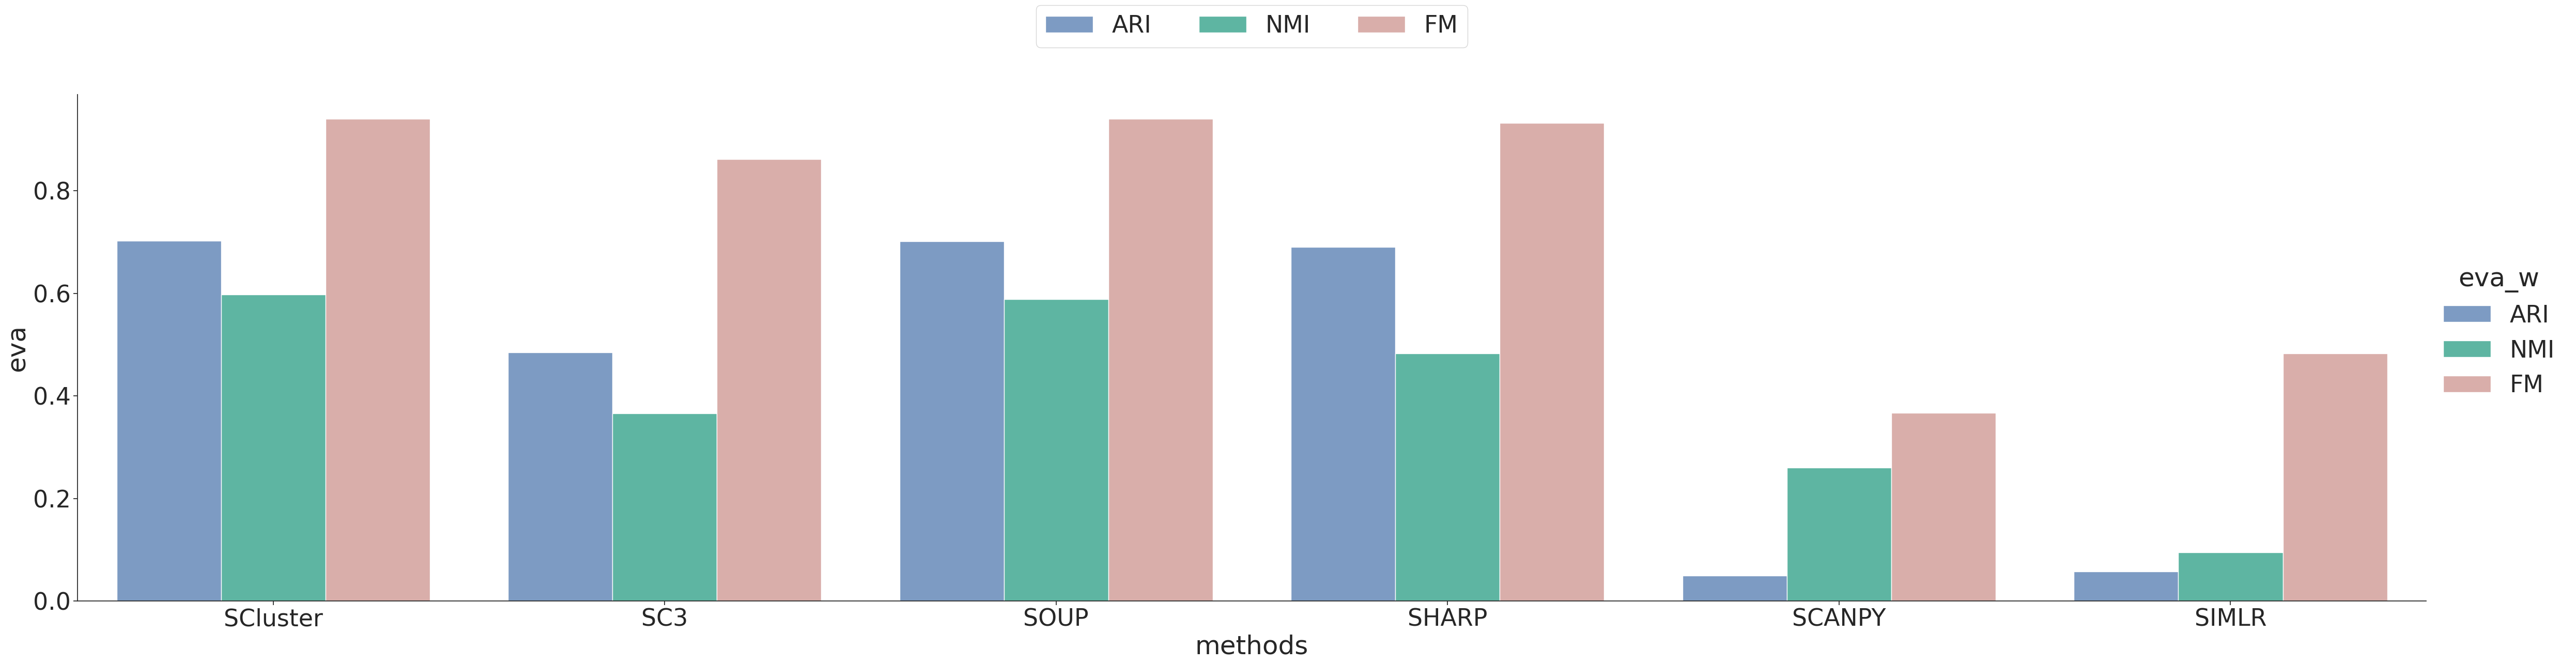

In [ ]:
software=["SCluster",'SC3','SOUP','SHARP','SCANPY','SIMLR']
def tips(methods,eva):
    tip=pd.DataFrame()
    tip['eva']=eva
    tip['eva_w']=['ARI','NMI','FM']
    tip['methods']=[methods for _ in range(3)]
    return tip
data=[]
for i in zip(software,[SCluster,sc3,soup,sharp,scanpy,simlr]):
    data.append(tips(i[0],i[1]))
data=pd.concat(data)

import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(font_scale = 5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params,font_scale = 3)
# Draw a nested barplot by species and sex
fig=sns.catplot(
    data=data, kind="bar",
    x="methods", y="eva", hue="eva_w",
    errorbar="sd", palette=['#7199cf', '#4fc4aa', '#e1a7a2'], height=12,aspect=4
)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2), ncol=3)